In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


In [3]:
cifar10= keras.datasets.cifar10
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
x_train= x_train/255.0
y_train= y_train/255.0

In [8]:
tf.random.set_seed(101)
tf.keras.backend.clear_session()

model= None

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


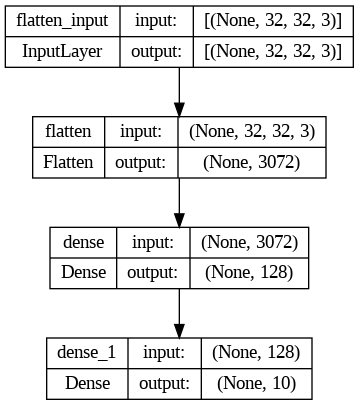

In [10]:
from keras.utils import plot_model
plot_model(model, 'model.png', show_shapes= True)

In [11]:
model.compile(optimizer= 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
782/782 [==============================] - 11s 6ms/step - loss: 0.0044 - accuracy: 0.0998 - val_loss: 16577.2305 - val_accuracy: 0.1000
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 6.0122e-07 - accuracy: 0.1000 - val_loss: 17944.0840 - val_accuracy: 0.1000
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 2.0938e-07 - accuracy: 0.1000 - val_loss: 19240.5410 - val_accuracy: 0.1000
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 7.2335e-08 - accuracy: 0.1000 - val_loss: 20017.0977 - val_accuracy: 0.1000
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 3.6550e-08 - accuracy: 0.1000 - val_loss: 20696.1172 - val_accuracy: 0.1000
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 1.9428e-08 - accuracy: 0.1000 - val_loss: 21130.7305 - val_accuracy: 0.1000
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2588e-08 - accuracy: 0.1000